# Insurance Claims- Fraud Detection
### Problem Statement:
### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

#### Note: Use the link below to reach to your dataset. 


#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Importing the libraries

In [158]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [2]:

df = pd.read_csv("D:/Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Shape of the dataset

#### The dataset appears to have a total of 1000 records and 40 columns including 1 target column

In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Preporcessing


### We have 2 float64 type features,  17 int64 type features and 21 object type features which also inludes target column "fraud_reported"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Lets plot a heatmap to identify if any null values

#### We have entire column missing in "_c39 "

In [17]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

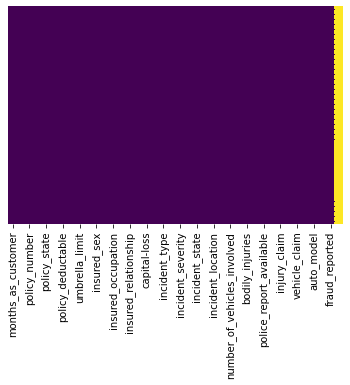

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## Observe the individual columns

### We can see the columns "collision_type",  "property_damage", and "police_report_available" have few records with value "?"

### Although we consider this as missing value, dataframe will not recognize as it's in object format.

### Hence I will replace the "?" value with specific number.

### If we observe below we have 178 ? in column "collision_type",  360 ? in column  "property_damage"  and   343 ? in column "police_report_available". In this case i will proceed with replacing the "?" value with thye "mode" value


In [18]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [19]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [20]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

### Replace "?" with mode

In [21]:
df["collision_type"] = df["collision_type"].str.replace("?","Rear Collision")

df["property_damage"] = df["property_damage"].str.replace("?","NO")

df["police_report_available"] = df["police_report_available"].str.replace("?","NO")

### We can now see all the "?" are replaced with the mode

In [22]:
df["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [23]:
df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [24]:
df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

###  Let's drop the empty column "_c39 "

In [7]:
df.drop(columns = ["_c39"], axis=1, inplace=True)

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [25]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Lets plot a couple of plots for further understanding

#### The below graph and stats show the percentage of people who reported fraud cases or not

#### We can see that approximately 75.3 % of cases are authentic and about 24.7 % of cases are reported as fraud.

#### Although it's not such a huge number, when it comes to banks and financial systems, this is ann alarming number and measures have to be taken to improve the systems

In [11]:
fraud_percent = (df["fraud_reported"].value_counts()/df.shape[0])*100
print(fraud_percent)

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64


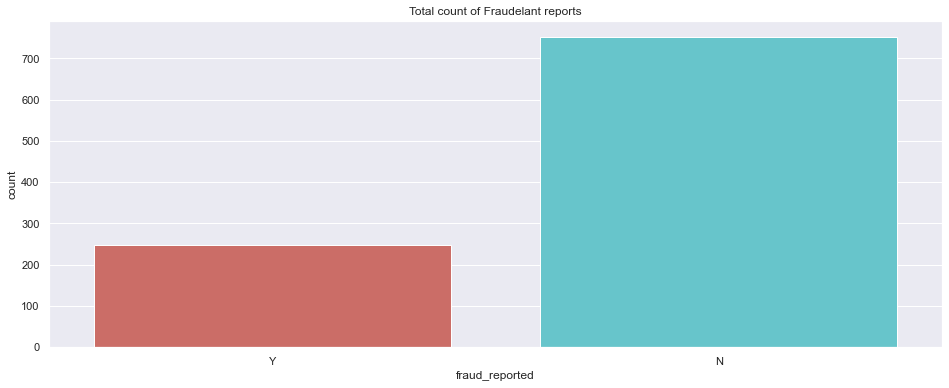

In [10]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="fraud_reported", data=df, palette="hls").set(title='Total count of Fraudelant reports')

#### Let's observe the stats on automakers

#### We can see Saab, Dodge and Suburu are the leading automakers with availability of insurance.

#### But other car manufactures are not far away and their count percentage is almost th same if not entirely equal

#### Honda seems to be have less count compared to others 

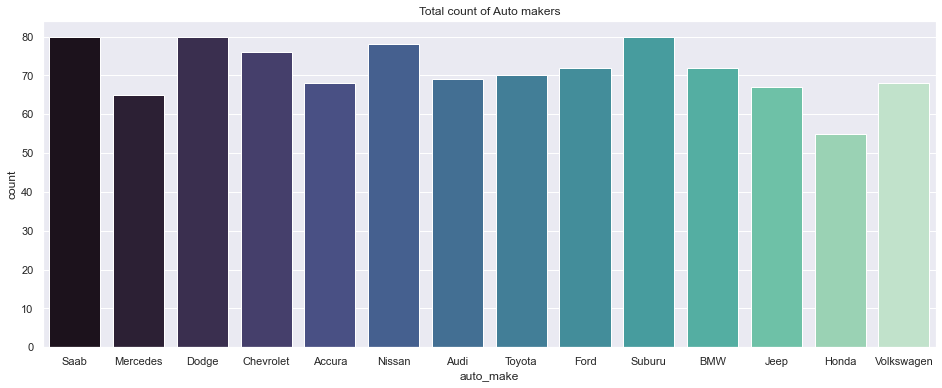

In [13]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="auto_make", data=df, palette="mako").set(title='Total count of Auto makers')

#### Lets now compare insured people based on Gender.

#### We can see that Female appear to have insured more than Males 

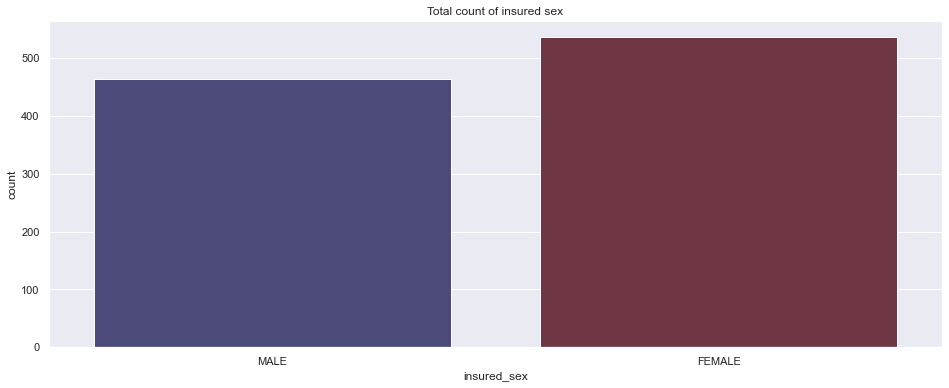

In [27]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_sex",data=df, palette="icefire").set(title='Total count of insured sex')

#### Let's see if there is any relationship between the insured person and education level of the person

#### From this plot, although we cannot conclude education level is solely responsible, we can consider that education of some level is required to be part of insurance policy.

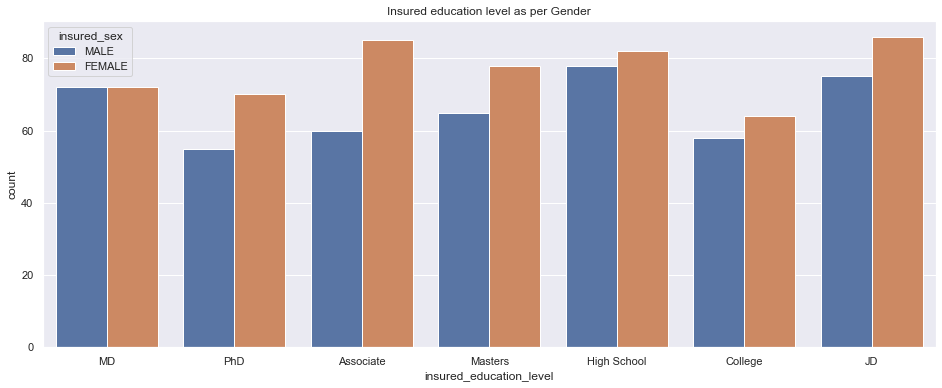

In [16]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_education_level", hue="insured_sex", data=df).set(title='Insured education level as per Gender')

#### From the below plot we can see literally every person irrespective of occupation is insured.

#### The insurance claim and amout could vary based on car auto year and model and one's income also but overal there is no much changes

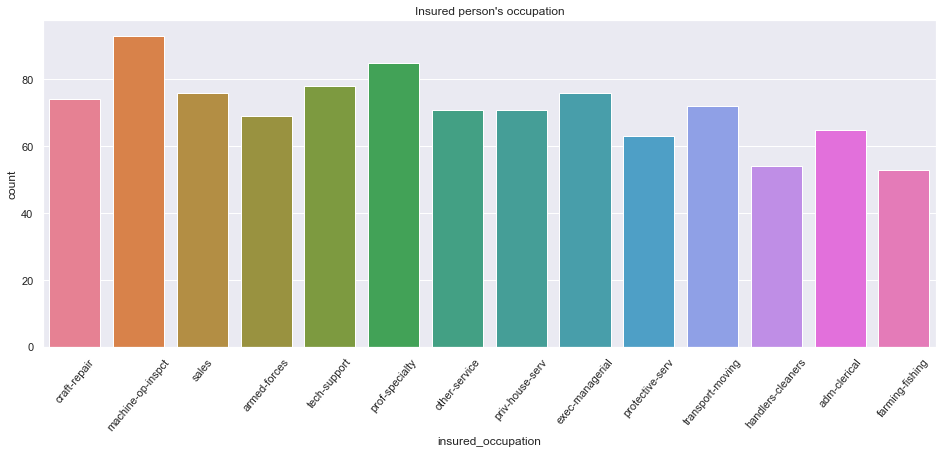

In [31]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_occupation",data=df, palette="husl").set(title="Insured person's occupation")
plt.xticks(rotation=50)
plt.show()


#### We can see from the below plot the fraud reported over the severity of incidents

#### We can see that fraud counts are high in the cases of major damages compared to other group of severity

#### Leaking coolant, Deployed airbags,Damaged suspension, Missing lights,  Broken windows etc fall under this category and it's likely possible people may falsely claim insurance in such cases by making it look very serious acident

#### Also major accident means major expenses and this could be one loophole taken advantage of to claim money.

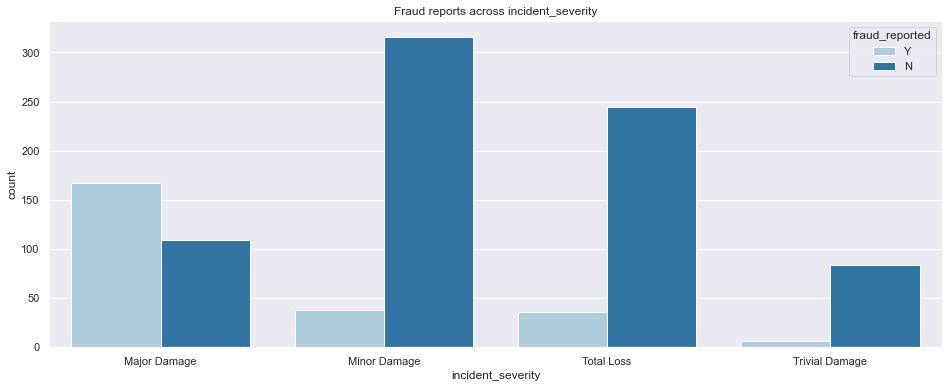

In [33]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="incident_severity", hue="fraud_reported", data=df, palette="Paired").set(title='Fraud reports across incident_severity')


#### Let's see if there is any relationship between accident severity and number of vehicles involved

#### We can see that all severities are high where only 1 vehicle is included and less where 4 vehicles are included.

#### This dataset records may not consist of details of all the road accidents geography and these accidents may very well have occured at one way road or high ways.

#### Hence we can see there is Total Loss in case of accidents that involve 1 vehicle

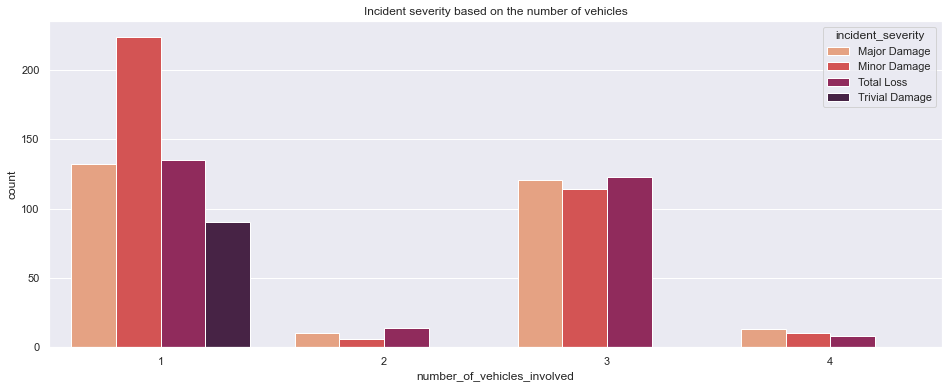

In [40]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="number_of_vehicles_involved", hue="incident_severity", data=df, palette="rocket_r").set(title='Incident severity based on the number of vehicles')

#### We can see from the below plot that "Columbus" city has highest number of "Major accidents" and Springfield has majority of "Minor accidents"

#### Also other cities have some variation in theh degree of accidents but "Columbus" has almost severe amout of damages caused and there is very minimal sign of trivial damage.

#### Accidents happen if the roads are not good, if there is no proper direction etc and this could be the case over here also

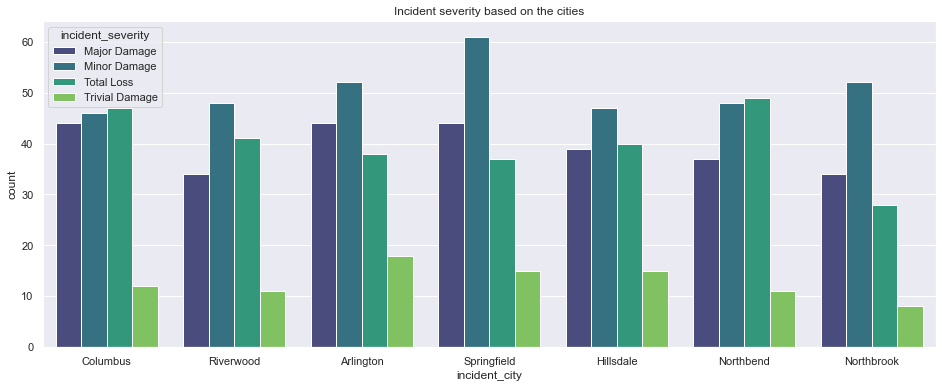

In [42]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="incident_city", hue="incident_severity", data=df, palette="viridis").set(title='Incident severity based on the cities')

#### Let's see if there is any relstionship between incident severity and authorities contacted

#### We can see in cases of "Major accident", Fire department was called first. Maybe the vehicle was compromised in such a way causing fire hence fire departments were approached first

#### The second most concated authorty is "ambulance" and it makes sense as one is likely to be injured in such accidents

#### We can also find in some cases people may have contacted other means to deal with this rather than the usual departments

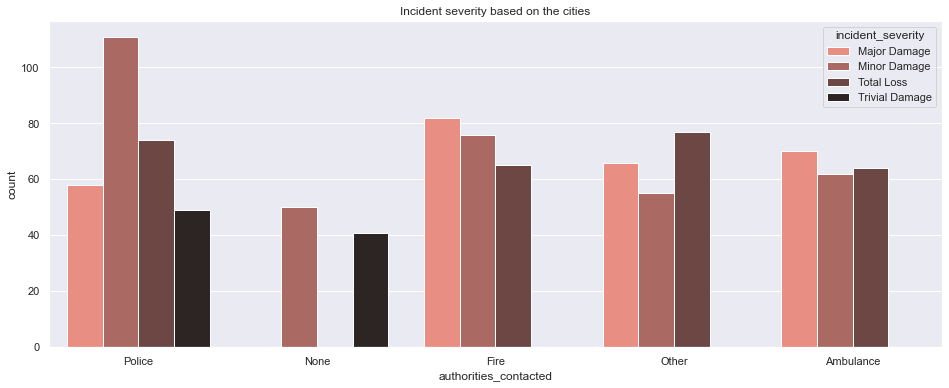

In [46]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="authorities_contacted", hue="incident_severity", data=df, palette="dark:salmon_r").set(title='Incident severity based on the cities')


#### When it comes to policy deduction, we can see there is no much difference and its almost equal. 

#### This shows the policy could be of any kind based on the vehicle type, state, jurisdiction but the equal percentage is removed as and when required when someone claims based on incident severity.

#### So policy type and incident type play a vital role


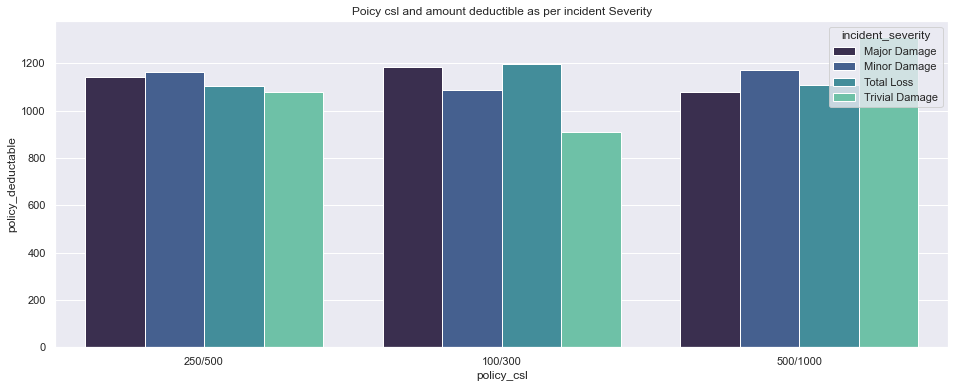

In [51]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="policy_csl", y="policy_deductable", data=df, palette="mako", hue="incident_severity", ci=None, orient="v").set(title='Poicy csl and amount deductible as per incident Severity')

#### We can observe from the below plot that majority of people haven't reported false fraud

#### But amongst highest frauds that may have occured, people fall under occupation "exec-managerial". It is not that easy to get any fake fraud claimed and with certain social connections once could be able to get it done.

#### We can see that in the plot and that could be the scenario over here.

#### We can see that priv-house-serv, handlers, admin cerical clearly are not at top end position and egtting this done would be less than the former scenario

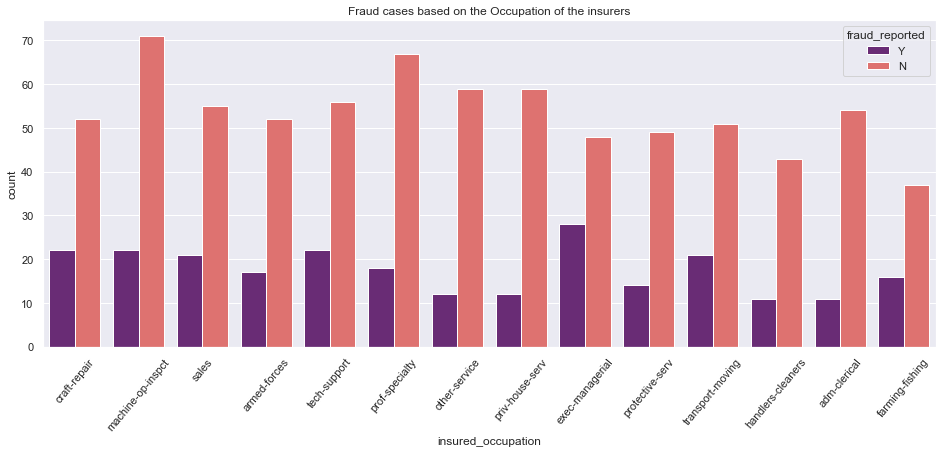

In [54]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_occupation", hue="fraud_reported", data=df, palette="magma").set(title='Fraud cases based on the Occupation of the insurers')
plt.xticks(rotation=50)
plt.show()

#### Let's see if there is any relationship between incident type and collision type 

#### We can observe that "single vehicle collission" and "multi vehicle collission" has all type of collisions.

#### in case of "theft" there is no much damages as a peron may be trying to open to door and jukmp start vehicle hence there is rear and side collission 

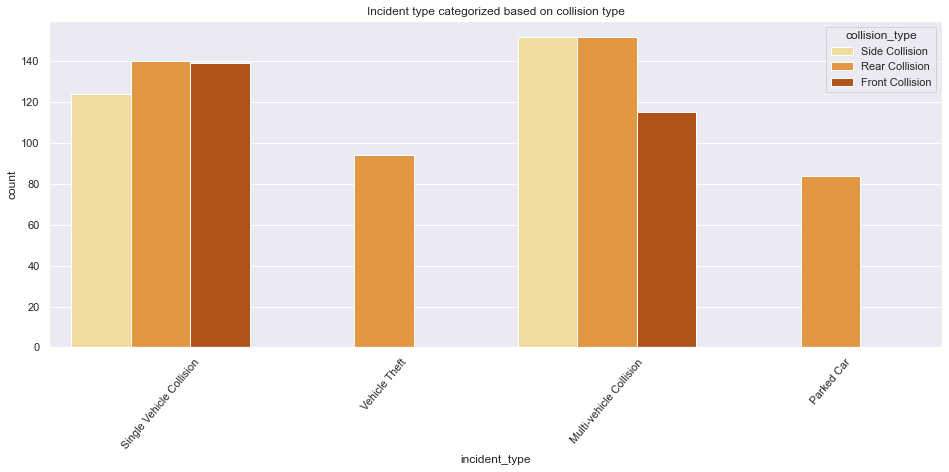

In [57]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="incident_type", hue="collision_type", data=df, palette="YlOrBr").set(title='Incident type categorized based on collision type')
plt.xticks(rotation=50)
plt.show()

#### Let's observe if there is any relationship between incident types and bodily injuries

#### We can see that injuries are less in the case of "vehicle theft" and "parked car". ACcidents are likey to happen when a car is parked unless other vehicle smashes into one. 

#### Also in case of theft there is less possibility in getting hurt unless one fights back.

#### So major injuries occur or sustain in "single vehicle collission" and "multi vehicle colission"

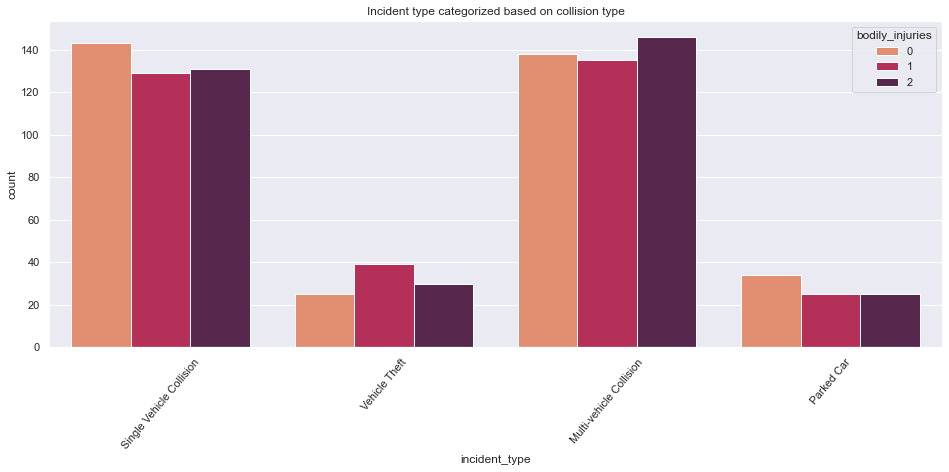

In [72]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="incident_type", hue="bodily_injuries", data=df, palette="rocket_r").set(title='Incident type categorized based on collision type')
plt.xticks(rotation=50)
plt.show()

#### Let's observe if there is any relationship between incident type and police report filed.

#### We can see police report was filed in both "single vehicle collission" and "multiple vehicle collision" and is alost equal.

#### But we also see there are major cases where people have not filed for police report. It is obvious if an accident takes place "reports" are usualy created at police station.

#### No report can either suggest that the accident severity is not so high for a report to be filed.



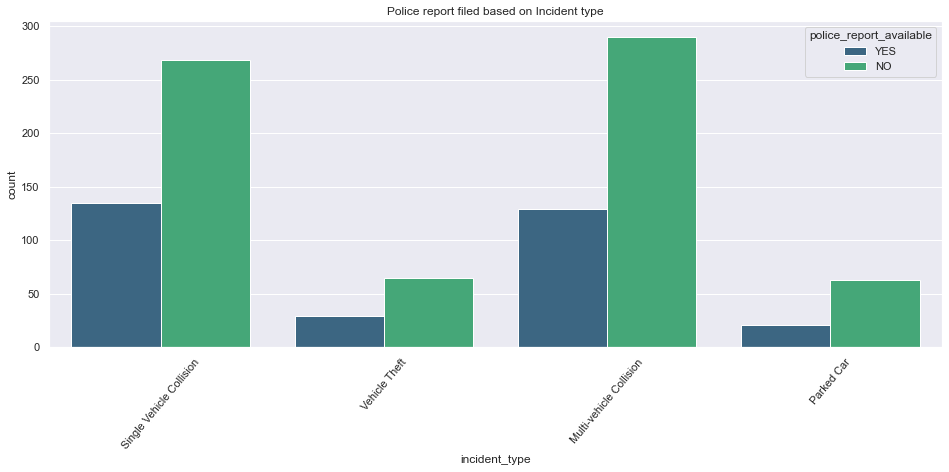

In [63]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="incident_type", hue="police_report_available", data=df, palette="viridis").set(title='Police report filed based on Incident type')
plt.xticks(rotation=50)
plt.show()

#### Let's observe if there is any relationship between the witnesses and fraud committed or observed.

#### We can see that fraud reporting is not easily possible in all cases, howver in cases where witnesses are more fraud has also been increased.

#### Maybe it's relatively easier to falsify or claim insurance when a person has witness. Witness could be someone present in that accident or could be someone falsifying statements


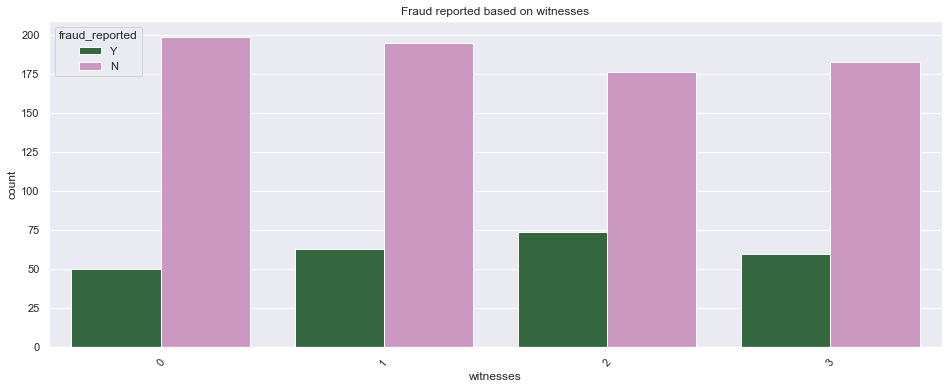

In [75]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="witnesses",data=df, palette="cubehelix", hue="fraud_reported").set(title="Fraud reported based on witnesses")
plt.xticks(rotation=50)
plt.show()

#### Let's see if there is any relationship between the auto year and total claimed amount

#### we can observe that  between auto the year's 1995 to 1997 and 2009 to 2011 there have been increase in total amont claims more than anticipated.

#### This could also indicate that the auto make year could be vintage or unique for which more amoit was claimed.

#### Irrespective of models or auto year, we can generally see when fraud insurance is claimed, amout is always higher than the actual amout in all the below cases and are nowhere equal.

[Text(0.5, 1.0, 'Amount claimed based on auto year')]

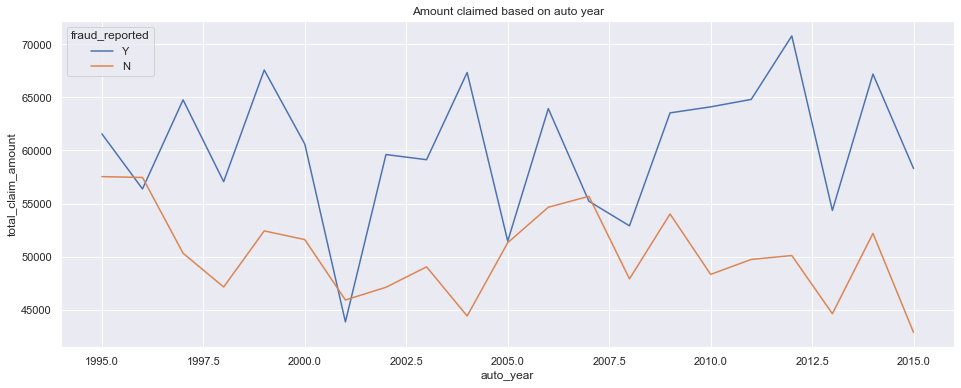

In [78]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="auto_year", y="total_claim_amount", hue="fraud_reported", ci=None).set(title='Amount claimed based on auto year')

# Preprocessing

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### Also because, we have more than 22 categorical columns and all are converted to numerical as follows

In [80]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [83]:
df_new1 = lab_enc.fit_transform(df["policy_bind_date"])
df_new2 = lab_enc.fit_transform(df["policy_state"])
df_new3 = lab_enc.fit_transform(df["policy_csl"])
df_new4 = lab_enc.fit_transform(df["policy_annual_premium"])
df_new5 = lab_enc.fit_transform(df["insured_sex"])
df_new6 = lab_enc.fit_transform(df["insured_education_level"])
df_new7 = lab_enc.fit_transform(df["insured_occupation"])
df_new8 = lab_enc.fit_transform(df["insured_hobbies"])
df_new9 = lab_enc.fit_transform(df["insured_relationship"])
df_new10 = lab_enc.fit_transform(df["incident_date"])
df_new11 = lab_enc.fit_transform(df["incident_type"])
df_new12 = lab_enc.fit_transform(df["collision_type"])
df_new13 = lab_enc.fit_transform(df["incident_severity"])
df_new14 = lab_enc.fit_transform(df["authorities_contacted"])
df_new15 = lab_enc.fit_transform(df["incident_state"])
df_new16 = lab_enc.fit_transform(df["incident_city"])
df_new17 = lab_enc.fit_transform(df["incident_location"])
df_new18 = lab_enc.fit_transform(df["property_damage"])
df_new19 = lab_enc.fit_transform(df["police_report_available"])
df_new20 = lab_enc.fit_transform(df["auto_make"])
df_new21 = lab_enc.fit_transform(df["auto_model"])
df_new22 = lab_enc.fit_transform(df["fraud_reported"])
                                   

In [84]:
df["policy_bind_date"] = df_new1
df["policy_state"] = df_new2
df["policy_csl"] = df_new3
df["policy_annual_premium"] = df_new4
df["insured_sex"] = df_new5
df["insured_education_level"] = df_new6
df["insured_occupation"] = df_new7
df["insured_hobbies"] = df_new8
df["insured_relationship"] = df_new9
df["incident_date"] = df_new10
df["incident_type"] = df_new11
df["collision_type"] = df_new12
df["incident_severity"] = df_new13
df["authorities_contacted"] = df_new14
df["incident_state"] = df_new15
df["incident_city"] = df_new16
df["incident_location"] = df_new17
df["property_damage"] = df_new18
df["police_report_available"] = df_new19
df["auto_make"] = df_new20
df["auto_model"] = df_new21
df["fraud_reported"] = df_new22

In [85]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,732,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,396,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,740,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,743,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,902,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [86]:
df.shape

(1000, 39)

# Distribution of all the columns in the dataset


### All the features seem to normally distributed. Since we have multiple features, lets try to identify the distribution

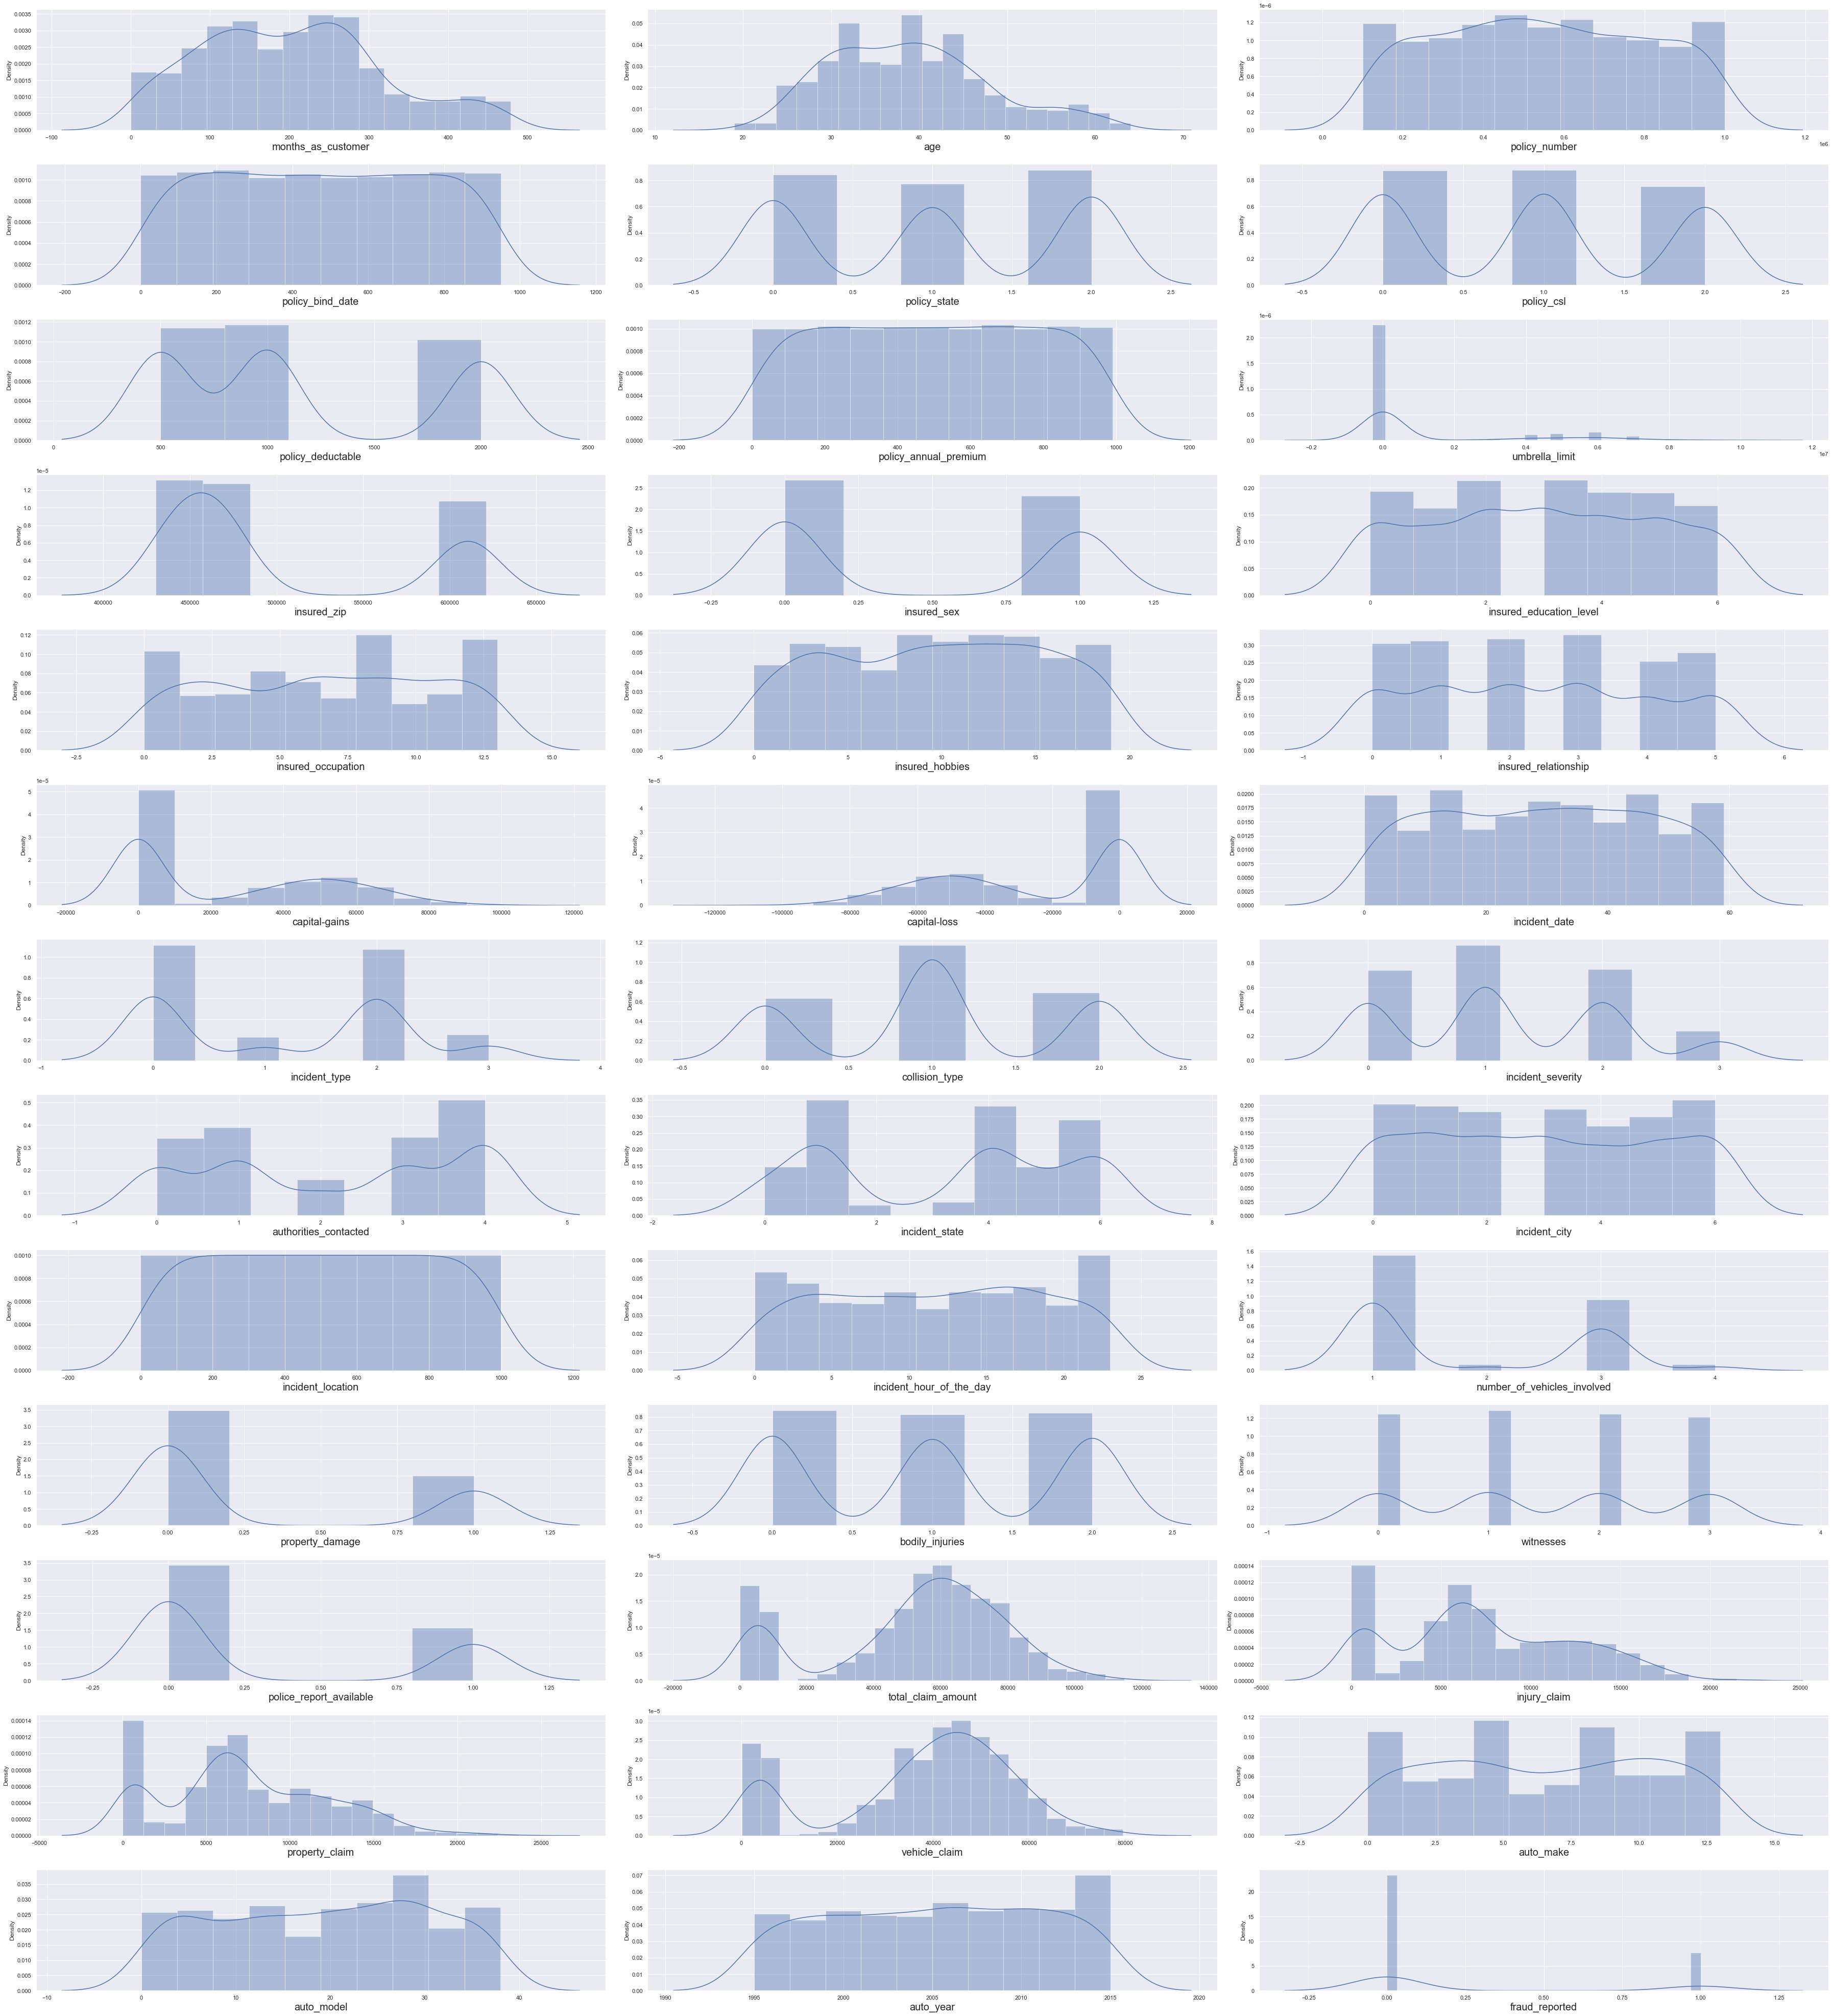

In [87]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=39:
        ax = plt.subplot(13,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### I have considered columns "policy_deductable", "policy_annual_premium", "umbrella_limit", "capital-gains", "capital-loss", "total_claim_amount", "injury_claim", "property_claim"  and  "vehicle_claim" as these are the only continous data columns.

### The remaining numerical columns are all in general categorical in nature and applying this method makes no sense.

In [88]:
from scipy.stats import zscore

z_score = zscore(df[["policy_deductable", "policy_annual_premium", "umbrella_limit", "capital-gains", "capital-loss",
                    "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]])

abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,9.830000e+02,983.000000,...,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,204.315361,38.950153,546143.815870,473.978637,1.018311,0.947101,1136.317396,495.599186,9.888098e+05,500813.196338,...,1.485249,0.315361,52685.798576,7431.617497,7383.713123,37870.467955,6.570702,19.256358,2005.142421,0.245168
std,115.386900,9.182610,257739.467619,275.961420,0.830718,0.804297,610.693463,286.652678,2.118409e+06,71452.237795,...,1.112572,0.464896,26360.841680,4889.687653,4792.825654,18859.272274,4.033570,11.120860,6.016784,0.430406
min,0.000000,19.000000,100804.000000,0.000000,0.000000,0.000000,500.000000,0.000000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,116.000000,32.000000,335264.500000,232.500000,0.000000,0.000000,500.000000,245.500000,0.000000e+00,448451.000000,...,0.500000,0.000000,41695.000000,4275.000000,4470.000000,30200.000000,3.000000,10.000000,2000.000000,0.000000
50%,200.000000,38.000000,533940.000000,472.000000,1.000000,1.000000,1000.000000,496.000000,0.000000e+00,466393.000000,...,1.000000,0.000000,57900.000000,6770.000000,6750.000000,42080.000000,7.000000,20.000000,2005.000000,0.000000
75%,277.500000,44.000000,760439.500000,713.500000,2.000000,2.000000,2000.000000,743.500000,0.000000e+00,603159.000000,...,2.000000,1.000000,70450.000000,11290.000000,10860.000000,50735.000000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.000000,2.000000,2000.000000,990.000000,7.000000e+06,620962.000000,...,3.000000,1.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case we are losing about 1.7 % of data after applying z-score

In [89]:
# Percentage data loss:

loss_percent = (1000-983)/1000*100
print(loss_percent)

1.7000000000000002


## Correlation of the features with the dependent variable "fraud_reported"

#### 

In [90]:

corr_matrix = df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170866
total_claim_amount             0.164599
property_claim                 0.141162
injury_claim                   0.089986
policy_bind_date               0.062571
witnesses                      0.049028
number_of_vehicles_involved    0.046389
umbrella_limit                 0.044336
bodily_injuries                0.038257
policy_state                   0.035849
insured_relationship           0.029521
property_damage                0.025416
months_as_customer             0.019849
insured_sex                    0.018767
policy_deductable              0.014131
age                            0.012371
insured_zip                    0.012011
insured_education_level        0.010369
auto_year                      0.004198
incident_hour_of_the_day       0.003022
auto_model                    -0.001230
insured_occupation            -0.002201
incident_location             -0.010343
capital-gains                 -0.014713


## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


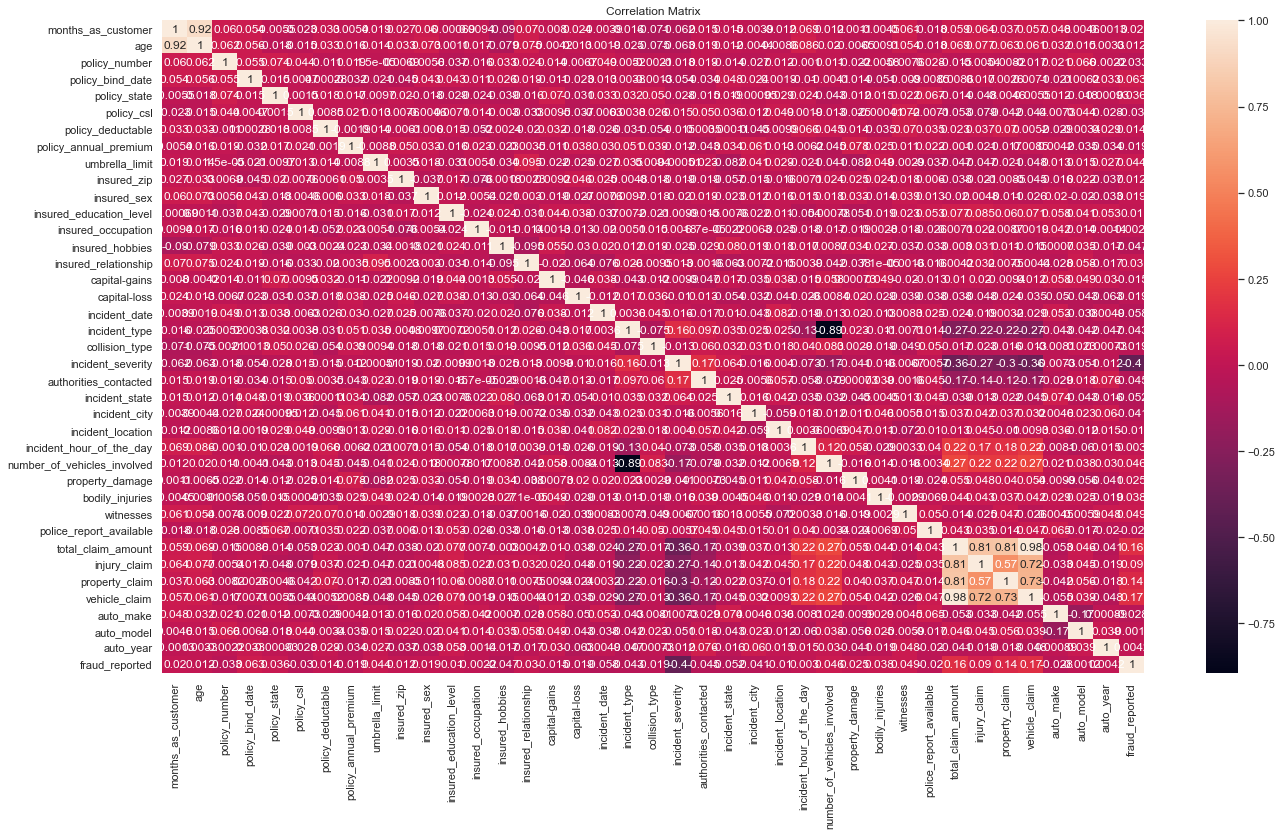

In [91]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [92]:
x = df.drop(columns = ["fraud_reported"], axis=1)
y = df["fraud_reported"]

### Check for skewness of data

In [93]:
x.skew()

months_as_customer             0.366978
age                            0.478560
policy_number                  0.039782
policy_bind_date               0.004324
policy_state                  -0.034234
policy_csl                     0.096017
policy_deductable              0.479334
policy_annual_premium         -0.001220
umbrella_limit                 1.806345
insured_zip                    0.831572
insured_sex                    0.140949
insured_education_level        0.004804
insured_occupation            -0.052521
insured_hobbies               -0.061328
insured_relationship           0.078645
capital-gains                  0.469129
capital-loss                  -0.373733
incident_date                  0.003394
incident_type                  0.091084
collision_type                -0.031080
incident_severity              0.280436
authorities_contacted         -0.113368
incident_state                -0.152489
incident_city                  0.048398
incident_location             -0.002770


# Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go


In [105]:
features = ["policy_deductable", "policy_annual_premium", "umbrella_limit", "capital-gains", "capital-loss",
                    "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.07245795,  0.98604365, -0.09533393, ...,  0.85062198,
        -1.64246755, -0.18996904],
       [ 0.20536729,  0.33230203, -0.78908866, ...,  0.35453097,
        -0.65283189,  0.30888999],
       [-0.60969793, -1.08413814,  0.5494938 , ..., -0.63765107,
         0.96657193,  0.30888999],
       ...,
       [-0.64438156, -0.53935346,  1.44549742, ...,  1.09866749,
        -0.02306374, -1.52025979],
       [ 2.19967581,  2.51144076, -0.04737353, ..., -1.38178759,
        -1.28260003, -1.1876871 ],
       [ 2.182334  ,  2.29352689,  0.0385709 , ...,  0.35453097,
        -0.65283189,  0.30888999]])

# Power Transformer (yeo-Johnson)
To reduce the skewness to some extent, I have used a Power Transformer technique
Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

## The data is further standardized

In [106]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.064897,0.829284,-0.336348,1.028483,1.049422,0.719894,0.007764,1.090082,0.758101
1,1.273550,-0.237238,1.484887,-0.987648,1.049422,-1.776823,-1.521992,-1.562598,-1.786107
2,1.273550,0.852654,1.484887,0.954363,1.049422,-0.715042,0.225227,-0.581311,-0.818921
3,1.273550,0.861398,1.791188,1.013216,-1.005346,0.395052,-0.024676,-0.035625,0.681887
4,0.064897,1.311360,1.791188,1.066306,-0.940572,-1.729580,-1.300544,-1.627121,-1.739449
...,...,...,...,...,...,...,...,...,...
995,0.064897,0.360384,-0.336348,-0.987648,1.049422,1.344085,1.634380,0.405610,1.264387
996,0.064897,0.925214,-0.336348,1.078966,1.049422,2.209219,1.712670,1.782387,1.910982
997,-1.215338,0.708327,0.841840,0.954363,1.049422,0.556913,0.189765,0.186781,0.781673
998,1.273550,0.591318,1.484887,-0.987648,1.049422,-0.244967,-0.248734,-0.267246,-0.101194


# Check the skewness of the feature dataset
The skewness seems to have reduced considerably

In [107]:
x.skew()

months_as_customer             0.366978
age                            0.478560
policy_number                  0.039782
policy_bind_date               0.004324
policy_state                  -0.034234
policy_csl                     0.096017
policy_deductable              0.022697
policy_annual_premium         -0.288918
umbrella_limit                -7.953468
insured_zip                    0.831572
insured_sex                    0.140949
insured_education_level        0.004804
insured_occupation            -0.052521
insured_hobbies               -0.061328
insured_relationship           0.078645
capital-gains                  0.029301
capital-loss                   0.090459
incident_date                  0.003394
incident_type                  0.091084
collision_type                -0.031080
incident_severity              0.280436
authorities_contacted         -0.113368
incident_state                -0.152489
incident_city                  0.048398
incident_location             -0.002770


# Distribution after skewness is removed

#### AB and H features seem to be completely symmetrical

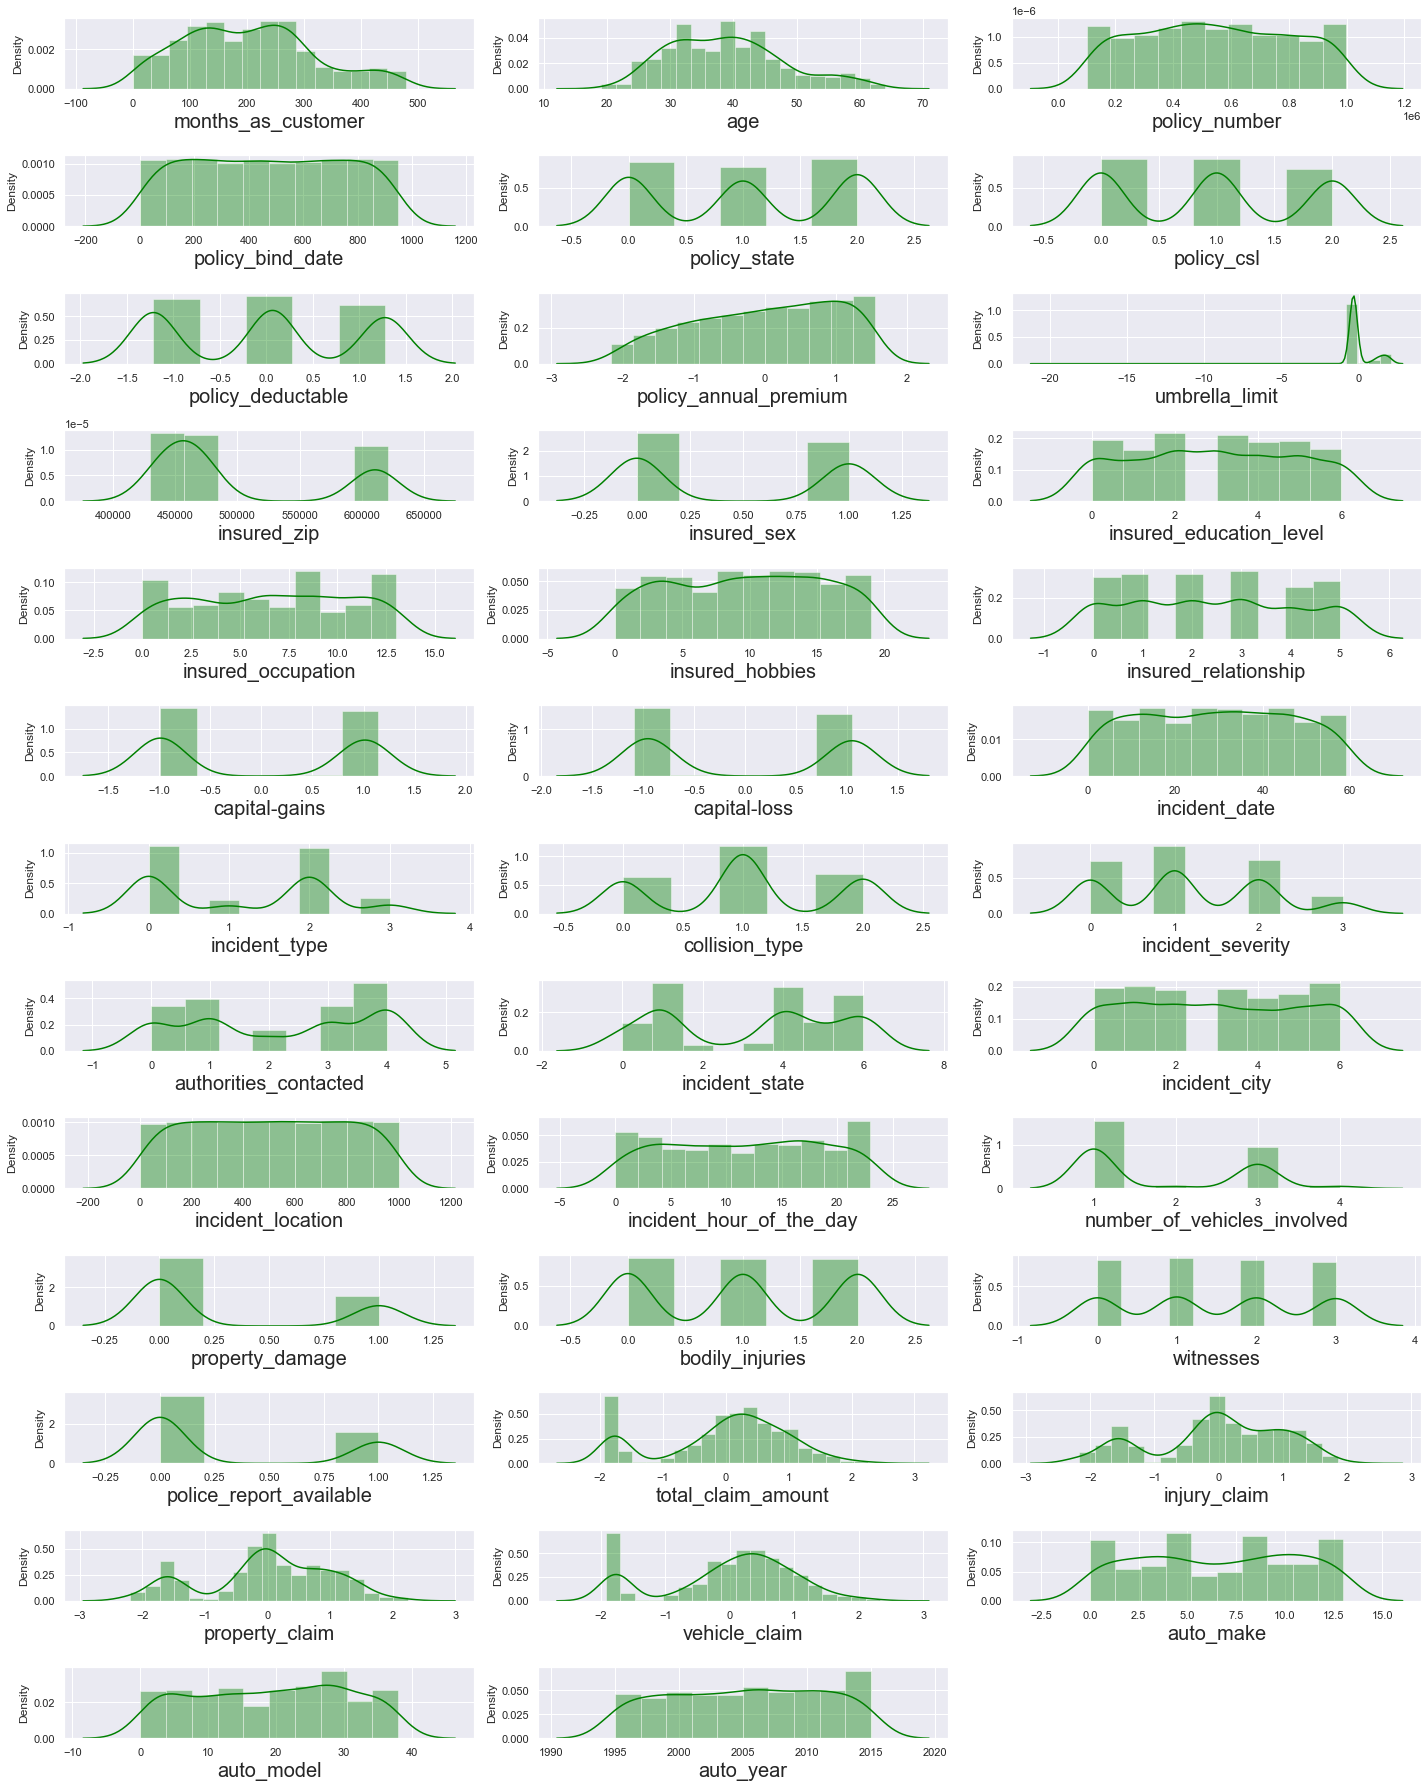

In [108]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=39:
        ax = plt.subplot(13,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,6.903036,months_as_customer
1,6.924948,age
2,1.032735,policy_number
3,1.027971,policy_bind_date
4,1.036760,policy_state
5,1.031997,policy_csl
6,1.040548,policy_deductable
7,1.036147,policy_annual_premium
8,1.040472,umbrella_limit
9,1.033871,insured_zip


#### The following columns seemed to add no much information and fter dropping the accuracy improved

#### Hence these columns are also dropped

In [110]:
x.drop(['policy_number', 'policy_bind_date', 'insured_zip', 'incident_date'], axis = 1, inplace=True)

# Check if the dataset is over sampling or under sampling

In [111]:
df["fraud_reported"].value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset.

In [112]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [113]:
y_over.value_counts()

0    742
1    742
Name: fraud_reported, dtype: int64

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in text dataset

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 6 ML models in thsi scenario

### 1) DecisionTreeClassifier 

In [116]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7914798206278026
[[176  50]
 [ 43 177]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       226
           1       0.78      0.80      0.79       220

    accuracy                           0.79       446
   macro avg       0.79      0.79      0.79       446
weighted avg       0.79      0.79      0.79       446



### 2) RandomForestClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8766816143497758
[[200  26]
 [ 29 191]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       226
           1       0.88      0.87      0.87       220

    accuracy                           0.88       446
   macro avg       0.88      0.88      0.88       446
weighted avg       0.88      0.88      0.88       446



### 3) GradientBoostingClassifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8789237668161435
[[198  28]
 [ 26 194]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       226
           1       0.87      0.88      0.88       220

    accuracy                           0.88       446
   macro avg       0.88      0.88      0.88       446
weighted avg       0.88      0.88      0.88       446



### 4) AdaBoostClassifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier

ad_class = AdaBoostClassifier()
ad_class.fit(x_train,y_train)

y_pred = ad_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8632286995515696
[[204  22]
 [ 39 181]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       226
           1       0.89      0.82      0.86       220

    accuracy                           0.86       446
   macro avg       0.87      0.86      0.86       446
weighted avg       0.87      0.86      0.86       446



### 5) ExtraTreesClassifier

In [120]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8856502242152466
[[203  23]
 [ 28 192]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       226
           1       0.89      0.87      0.88       220

    accuracy                           0.89       446
   macro avg       0.89      0.89      0.89       446
weighted avg       0.89      0.89      0.89       446



# Cross validation to check if its overfitting

In [121]:
from sklearn.model_selection import cross_val_score

In [123]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.7853620636071688


In [124]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.7711436859007562


In [125]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8220397803791567


In [126]:
scr = cross_val_score(ad_class, x, y, cv=5)
print("Cross Validation score of AdaBoostClassifier model is:", scr.mean())

Cross Validation score of AdaBoostClassifier model is: 0.8037190510722055


In [127]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.7599088366310991


# Selecting the best ML model for this dataset

### From the above algorithms DecisionTreeClassifier is an appropriate model for this dataset.

### Compared to other algorithms, DecisionTreeClassifier has the least difference between accuracy and cross validation

| Sr.No | Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeClassifier | 0.791479820627802 | 0.785362063607168 | 0.006117757020634 |
| 2 | RandomForestClassifier | 0.876681614349775 | 0.771143685900756 | 0.105537928449019 |
| 3 | GradientBoostingClassifier | 0.878923766816143 | 0.822039780379156 | 0.056883986436987 |
| 4 | AdaBoostClassifier | 0.863228699551569 | 0.803719051072205 | 0.059509648479364 |
| 5 | ExtraTreesClassifier | 0.885650224215246 | 0.759908836631099 | 0.125741387584147 |


# ROC AUC score for all the algorithms

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [149]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.7916532582461786

In [150]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8765687851971038

In [151]:
#ROC AUC score for GradientBoostingClassifier

roc_auc_score(y_test, gb_class.predict(x_test))

0.8789621882542237

In [152]:
#ROC AUC score for AdaBoostClassifier

roc_auc_score(y_test, ad_class.predict(x_test))

0.8626910699919549

In [153]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.8854786806114239

# ROC AUC score plots

#### We can see the ROC curve shows more for ExtraTreesClassifier. 

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

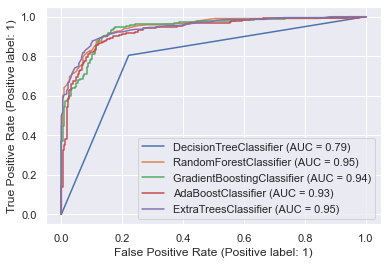

In [157]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(gb_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ad_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning

### Let us try to tune the proposed model (DecisionTreeClassifier) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [138]:
parameters = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_features":["auto", "sqrt", "log2"],
              "random_state":[50, 100, 150, 200, 250, 300],
              "min_samples_split":[1, 2, 3, 4, 5, 6],
              "min_samples_leaf":[1, 2, 3, 4, 5, 6]
              }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [140]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [141]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'random_state': [50, 100, 150, 200, 250, 300],
                         'splitter': ['best', 'random']})

In [142]:
GCV.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 150,
 'splitter': 'random'}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 79.14 % earlier and post Hyper Parameter tuning its now approximately 79.59 % better 

In [143]:
mod_dt_class = DecisionTreeClassifier(criterion= "entropy", max_features= "auto", min_samples_leaf= 5, min_samples_split= 2, random_state= 150, splitter= "random")

mod_dt_class.fit(x_train,y_train)
pred = mod_dt_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.5964125560538


# Saving the model (using joblib)

In [144]:
# Saving the model

import joblib
joblib.dump(mod_dt_class,"Auto_Insurance_Fraud.pkl")

['Auto_Insurance_Fraud.pkl']

# Loading the saved model

In [145]:
model = joblib.load("Auto_Insurance_Fraud.pkl")

In [146]:
prediction = model.predict(x_test)

In [147]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,1
2,0
3,0
4,0
...,...
441,0
442,0
443,0
444,1
